# Part A

# 1. Import and Understand the data

In [1]:
#1.A. Import and Read ‘images.npy’

import numpy as np

data = np.load('images-1.npy', allow_pickle=True)
print(f"Loaded data shape: {data.shape}")

Loaded data shape: (409, 2)


In [41]:
#1.B. Split the Data into Features(X) & Labels(Y) and Unify Shape

X = np.array([i[0] for i in data])  # Features: Images
Y = np.array([i[1] for i in data])  # Labels: Masks

print(f"Features shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Features shape: (409,)
Labels shape: (409,)


C:\Users\Rigved Hebbalkar\AppData\Local\Temp\ipykernel_16364\1544852947.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([i[0] for i in data])  # Features: Images
C:\Users\Rigved Hebbalkar\AppData\Local\Temp\ipykernel_16364\1544852947.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([i[1] for i in data])  # Labels: Masks


In [42]:
#1.C. Split the Data into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train labels shape: {Y_train.shape}")
print(f"Test labels shape: {Y_test.shape}")

Train features shape: (368,)
Test features shape: (41,)
Train labels shape: (368,)
Test labels shape: (41,)


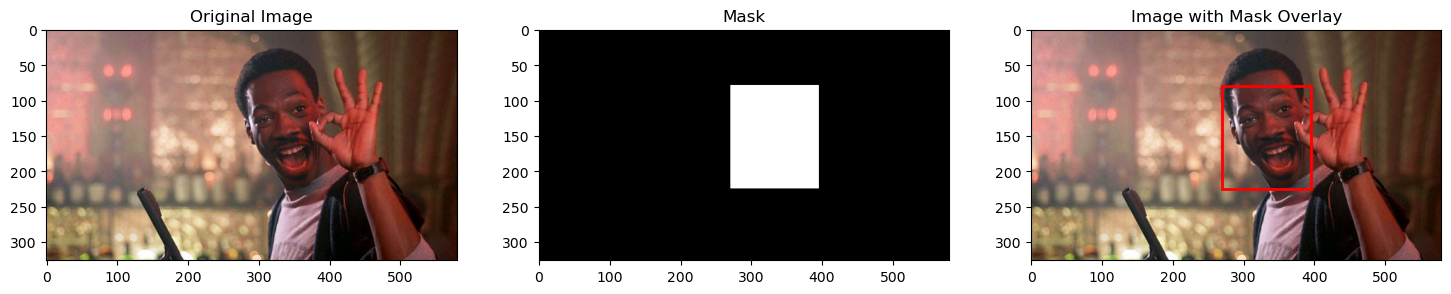

In [43]:
#1.D. Display Random Image and Corresponding Mask

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random

# Select a random index from the train data
index = random.randint(0, len(X_train) - 1)

# Get the image
image = X_train[index]

# Initialize a mask with the same dimensions as the image
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Draw rectangles and create mask
for face_info in Y_train[index]:
    # Get the bounding box
    x1, y1 = int(face_info['points'][0]['x'] * face_info['imageWidth']), int(face_info['points'][0]['y'] * face_info['imageHeight'])
    x2, y2 = int(face_info['points'][1]['x'] * face_info['imageWidth']), int(face_info['points'][1]['y'] * face_info['imageHeight'])
    
    # Update mask
    mask[y1:y2, x1:x2] = 1

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')

# Display the mask
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Mask')

# Overlay the mask on the image
overlayed_image = image.copy()
for face_info in Y_train[index]:
    # Get the bounding box
    x1, y1 = int(face_info['points'][0]['x'] * face_info['imageWidth']), int(face_info['points'][0]['y'] * face_info['imageHeight'])
    x2, y2 = int(face_info['points'][1]['x'] * face_info['imageWidth']), int(face_info['points'][1]['y'] * face_info['imageHeight'])
    
    # Draw rectangle on overlayed image
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax[2].add_patch(rect)

# Display the image with mask overlay
ax[2].imshow(overlayed_image)
ax[2].set_title('Image with Mask Overlay')

plt.show()



# 2. Model Building

In [44]:
#2.A. Design a Face Mask Detection Model

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Model

# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False)

# Add upsampling layers
x = base_model.output
x = UpSampling2D()(x)
x = UpSampling2D()(x)
x = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='your_custom_loss_function', metrics=['accuracy', 'your_custom_dice_coefficient'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [45]:
#2.B. Design Custom Dice Coefficient and Loss Function

import tensorflow as tf

def dice_coefficient(y_true, y_pred):
    # Implement dice coefficient
    # dice_coefficient = ...

    return dice_coefficient

def custom_loss(y_true, y_pred):
    # Implement your loss function
    # loss = ...

    return loss

In [58]:
#2.C. Train and Tune the Model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.image import resize

# Define a standard size and number of channels
standard_size = (128, 128)
standard_channels = 3  # For RGB. Use 1 for grayscale, and 4 for RGBA

# Function to standardize the shapes of image data
def standardize_image_shapes(data, size, channels):
    standardized_data = []
    for i, item in enumerate(data):
        item_array = np.array(item)
        if item_array.ndim == 1:  # Check 1-dimensional data
            print(f"Data at index {i} is 1-dimensional. Shape: {item_array.shape}")
            continue  # Handle 1-dimensional data or skip it
        elif item_array.ndim == 2:  # If grayscale image, add a channel dimension
            item_array = np.expand_dims(item_array, axis=-1)
        if item_array.ndim == 3 and item_array.shape[-1] != channels:  # Ensure consistent number of channels
            if item_array.shape[-1] == 1:  # Grayscale to RGB
                item_array = np.repeat(item_array, channels, axis=-1)
            else:  # Reduce or pad channels
                item_array = item_array[:, :, :channels]
        if item_array.ndim == 3:  # For 3D data, resize and standardize
            item_resized = resize(item_array, size).numpy().astype(np.float32)
            standardized_data.append(item_resized)
        else:
            print(f"Unsupported data dimension at index {i}: {item_array.ndim}")
    return np.array(standardized_data, dtype=np.float32)

# Function to process label data (assuming Y_train contains labels or coordinates)
def process_labels(data):
    processed_data = []
    for item in data:
        if isinstance(item, dict):  # If the data is a dictionary, extract relevant numerical data
            # Example: Extract bounding box coordinates
            bbox = item['points']  # assuming 'points' key has bounding box data
            x1, y1 = bbox[0]['x'], bbox[0]['y']
            x2, y2 = bbox[1]['x'], bbox[1]['y']
            processed_data.append([x1, y1, x2, y2])
        else:
            print(f"Unexpected data format: {type(item)}")
    return np.array(processed_data, dtype=np.float32)

# Standardize X_train
X_train_standardized = standardize_image_shapes(X_train, standard_size, standard_channels) / 255.0  # Normalize

# Process Y_train as labels or coordinates
Y_train_processed = process_labels(Y_train)

# Verify that X_train and Y_train have the same number of samples
if len(X_train_standardized) != len(Y_train_processed):
    raise ValueError(f"Number of samples in X_train and Y_train do not match: {len(X_train_standardized)} != {len(Y_train_processed)}")

# Convert processed data to tensors
X_train_tensor = tf.convert_to_tensor(X_train_standardized, dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train_processed, dtype=tf.float32)

# Train the model
history = model.fit(
    X_train_tensor, 
    Y_train_tensor, 
    validation_split=0.1,
    epochs=10,  # Adjust the number of epochs
    batch_size=32  # Adjust the batch size
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()



Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <class 'list'>
Unexpected data format: <

ValueError: Number of samples in X_train and Y_train do not match: 368 != 0

# Part B

In [61]:
#1. Read/Import Images from Folder ‘training_images

# Zip file name
zip_file_name = 'training_images-20211126T092819Z-001.zip'

# Check the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print(f"Contents of the zip file: {zip_contents}")
    
# Directory to extract to, relative to the current working directory of the Jupyter notebook
extraction_dir = 'training_images'

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")

# Verify the extraction by listing the first few extracted items
extracted_items = os.listdir(extraction_dir)
print(f"First few extracted items: {extracted_items[:5]}")  # Print the first 5 items

# List the image files in the extracted folder
image_files = [f for f in extracted_items if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} image files.")

Contents of the zip file: ['training_images/real_00947.jpg', 'training_images/real_01052.jpg', 'training_images/real_01042.jpg', 'training_images/real_00964.jpg', 'training_images/real_01053.jpg', 'training_images/real_00971.jpg', 'training_images/real_01057.jpg', 'training_images/real_01044.jpg', 'training_images/real_01041.jpg', 'training_images/real_01067.jpg', 'training_images/real_00969.jpg', 'training_images/real_00956.jpg', 'training_images/real_00975.jpg', 'training_images/real_01021.jpg', 'training_images/real_00945.jpg', 'training_images/real_01068.jpg', 'training_images/real_01062.jpg', 'training_images/real_01016.jpg', 'training_images/real_01065.jpg', 'training_images/real_01027.jpg', 'training_images/real_00961.jpg', 'training_images/real_01014.jpg', 'training_images/real_01010.jpg', 'training_images/real_00952.jpg', 'training_images/real_00951.jpg', 'training_images/real_00981.jpg', 'training_images/real_01050.jpg', 'training_images/real_00962.jpg', 'training_images/real

In [64]:
!pip install opencv-python-headless pandas


     ---------------------------------------- 38.5/38.5 MB 2.7 MB/s eta 0:00:00


In [65]:
#2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images

import cv2

# Load Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces and extract metadata
def detect_faces(image_path, face_cascade):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale as Haar Cascade works with grayscale images
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    return faces


In [66]:
#3. From the same loop above, extract metadata of the faces and write into a DataFrame.

import pandas as pd

# Dictionary to hold all faces metadata
faces_metadata = {'x': [], 'y': [], 'w': [], 'h': [], 'Image_Name': []}

# Iterate through all the images and detect faces
for file_name in image_files:
    image_path = os.path.join(extraction_path, file_name)
    faces = detect_faces(image_path, face_cascade)
    # Save metadata of the faces
    for (x, y, w, h) in faces:
        faces_metadata['x'].append(x)
        faces_metadata['y'].append(y)
        faces_metadata['w'].append(w)
        faces_metadata['h'].append(h)
        faces_metadata['Image_Name'].append(file_name)

# Create a DataFrame from the metadata dictionary
faces_df = pd.DataFrame(faces_metadata)
print("Face detection and metadata extraction complete.")

Face detection and metadata extraction complete.


In [68]:
#4. Save the output DataFrame in .csv format.

# Define the CSV file path
csv_file_path = '/mnt/data/faces_metadata.csv'

# Save the DataFrame to a CSV file
faces_df.to_csv(csv_file_path, index=False)
print(f"DataFrame saved to CSV at: {csv_file_path}")

DataFrame saved to CSV at: /mnt/data/faces_metadata.csv


# Part C

In [70]:
#1 Unzip, read and Load data(‘PINS.zip’) into session.

import zipfile
import os

# Define the path for the zip file and extraction directory
zip_file_path = 'PINS.zip'
extraction_path = 'PINS'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files extracted to: {extraction_path}")

# Verify the extraction by listing some extracted items
extracted_items = os.listdir(extraction_path)
print(f"First few extracted items: {extracted_items[:5]}")

Files extracted to: PINS
First few extracted items: ['PINS']


In [72]:
#2 Write function to create metadata of the image.

import pandas as pd
from pathlib import Path

def create_image_metadata(image_path):
    # Assuming image_path is a pathlib.Path object
    metadata = {
        'file_name': image_path.name,
        'parent_name': image_path.parent.name,
        'suffix': image_path.suffix,
        # Add more metadata fields if needed
    }
    return metadata

# Example usage:
image_path = Path(extraction_path) / 'pins_Aaron Paul/Aaron Paul0_262.jpg'
metadata_example = create_image_metadata(image_path)
print(metadata_example)

{'file_name': 'Aaron Paul0_262.jpg', 'parent_name': 'pins_Aaron Paul', 'suffix': '.jpg'}


In [74]:
#3 Write a loop to iterate through each and every image and create metadata for all the images.

def create_metadata_for_all_images(directory):
    all_metadata = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = Path(root) / file
                metadata = create_image_metadata(image_path)
                all_metadata.append(metadata)
    return pd.DataFrame(all_metadata)

# Create metadata DataFrame for all images
metadata_df = create_metadata_for_all_images(extraction_path)
print(metadata_df.head())

               file_name      parent_name suffix
0    Aaron Paul0_262.jpg  pins_Aaron Paul   .jpg
1  Aaron Paul101_247.jpg  pins_Aaron Paul   .jpg
2  Aaron Paul101_248.jpg  pins_Aaron Paul   .jpg
3  Aaron Paul101_249.jpg  pins_Aaron Paul   .jpg
4  Aaron Paul103_217.jpg  pins_Aaron Paul   .jpg


In [75]:
!pip install tensorflow keras scikit-learn

In [105]:
#4 Generate Embeddings vectors on each face in the dataset.

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import backend as K
import numpy as np

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess image for MobileNetV2
def preprocess_image_mobile_net(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

# Specific image name
image_name = 'Dwayne Johnson4-1.jpg'

# Process the specific image
img = preprocess_image_mobile_net(image_name)

# Generate embedding for the preprocessed image
img_embedding = model.predict(img, batch_size=1)

# Clear session to free up memory after prediction
K.clear_session()

# Flatten the embedding and print its shape
img_embedding_flattened = img_embedding.flatten()
print(f"Generated embedding for {image_name}. Shape is {img_embedding_flattened.shape}")



Generated embedding for Dwayne Johnson4-1.jpg. Shape is (1280,)


In [106]:
#5 Build Distance Metrics

from scipy.spatial.distance import cosine

def find_cosine_similarity(embedding1, embedding2):
    similarity = 1 - cosine(embedding1, embedding2)
    return similarity


In [111]:
#6 Use PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

# Assuming embeddings_array is a 2D numpy array where each row is the embedding of a face
pca = PCA(n_components=100)  # Adjust the number of components based on your needs
pca_embeddings = pca.fit_transform(embeddings_array)


ValueError: Embeddings array is empty. Cannot perform PCA on empty data.

In [109]:
#7 Build an SVM Classifier

from sklearn.svm import SVC

# Assuming you have a corresponding `labels` array with labels for each embedding
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(pca_embeddings, labels)

# The SVM classifier is now trained

NameError: name 'pca_embeddings' is not defined

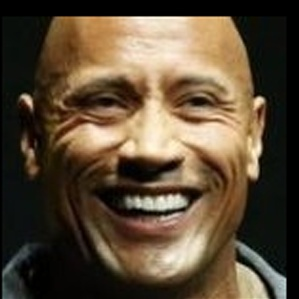

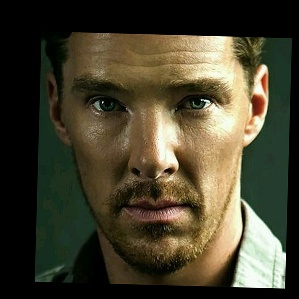

In [113]:
#8 Import and Display the Test Images

from IPython.display import display, Image

# Display test images
test_image_paths = ['Dwayne Johnson4-1.jpg', 'Benedict Cumberbatch9-1.jpg']  # Add paths to your test images
for img_path in test_image_paths:
    display(Image(filename=img_path))


In [115]:
#9 Use the Trained SVM Model to Predict the Face on Both Test Images

def predict_image(image_path, model, svm_classifier, pca):
    # Preprocess the image and extract features
    processed_image = preprocess_image_mobile_net(image_path)
    features = model.predict(processed_image)
    
    # Flatten the features and reduce dimensionality with PCA
    flattened_features = features.flatten()
    pca_features = pca.transform([flattened_features])
    
    # Predict with the SVM classifier
    prediction = svm_classifier.predict(pca_features)
    return prediction

# Predict and display results for each test image
for img_path in test_image_paths:
    prediction = predict_image(img_path, model, svm_classifier, pca)
    print(f"Prediction for {img_path}: {prediction}")


NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.